## **TASK 2**

## BY MAITHREYAN

## INTERNSHIP FOR THE SPARKS FOUNDATION

## IMPORTING PANDAS,NUMPY,MATPLOTLIB,SEABORN

In [85]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [91]:
# Reading data from site

SITE = "http://bit.ly/w-data"

data = pd.read_csv(SITE)

print("Data imported from url")

data.head(10)

Data imported from url


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [93]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [94]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours Studied Vs Scores')

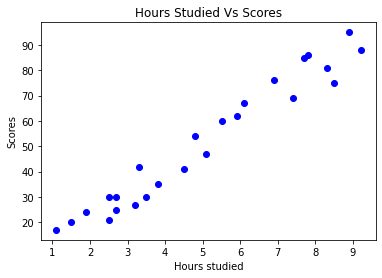

In [95]:
## scatter plot for visualizing the data

plt.scatter(data['Hours'],data['Scores'],color='blue')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Hours Studied Vs Scores")

Text(0.5, 1.0, 'Regression Plot')

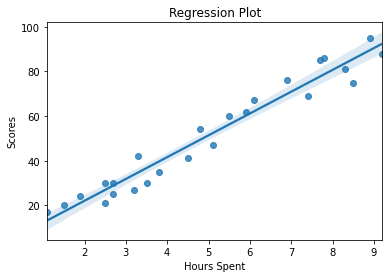

In [36]:
## used seaborn regplot for plotting

sns.regplot(x='Hours',y='Scores',data=data)
plt.xlabel('Hours Spent')
plt.ylabel('Scores')
plt.title('Regression Plot')

In [65]:
# assinging values to X and y

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

print (X)

print (y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [96]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [97]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("regression model training complete.")

regression model training complete.


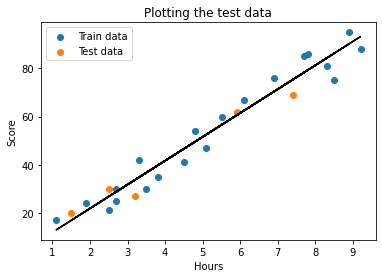

In [99]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train, label = 'Train data')
plt.scatter(X_test, y_test, label = 'Test data')
plt.legend()
plt.title("Plotting the test data")
plt.plot(X, line, color = 'black')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [77]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [63]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [81]:
# You can also test with your own data

hours = 9.25
predicted = regressor.predict([[hours]])

print(predicted)

[93.69173249]


In [83]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean square error :",mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean square error : 21.5987693072174
